In [65]:
# this is a noteboook to implement the prediction model on a single variaible

In [66]:
var='temperature'

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
# importing the dataset
df = pd.read_csv('json files/combined_data.csv')[0::22]
df.head()

,year,month,day,hour,zone,longitude,latitude,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,temperature,dewpt
0,2021,1,1,0,1,74.28,31.38,5,4058.84,30.40,42.16,0.00,9.78,395.20,484.22,26.35,5.6,4.3
22,2021,1,1,1,1,74.28,31.38,5,5447.39,63.48,44.55,0.00,12.16,488.46,585.86,27.11,5.4,4.5
44,2021,1,1,2,1,74.28,31.38,5,8117.68,135.90,48.67,0.00,16.69,658.20,779.81,33.44,4.4,4.4
66,2021,1,1,3,1,74.28,31.38,5,11856.08,243.19,59.63,0.05,21.46,863.67,1015.06,39.52,5.3,4.8
88,2021,1,1,4,1,74.28,31.38,5,12603.76,250.34,83.63,1.23,24.80,883.55,1027.48,41.54,5.7,4.6


In [69]:
# converting to hourly pandas datetime format
date_time = pd.to_datetime(df[['year','month','day','hour']], format='%Y-%m-%d %H:%M:%S')
date_time.head()

0    2021-01-01 00:00:00
22   2021-01-01 01:00:00
44   2021-01-01 02:00:00
66   2021-01-01 03:00:00
88   2021-01-01 04:00:00
dtype: datetime64[ns]

In [70]:
# creating a new dataframe with a variable and datetime as index
dataset=pd.DataFrame(df[var])
dataset.index=date_time
dataset.head()

,temperature
2021-01-01 00:00:00,5.6
2021-01-01 01:00:00,5.4
2021-01-01 02:00:00,4.4
2021-01-01 03:00:00,5.3
2021-01-01 04:00:00,5.7


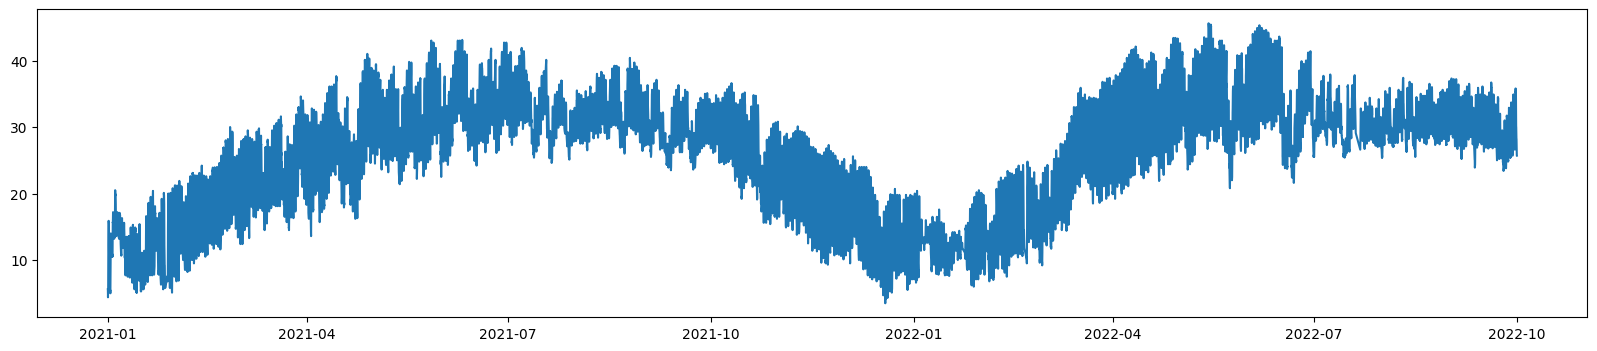

In [71]:
# plotting the data
plt.figure(figsize=(20,4))
plt.plot(dataset)

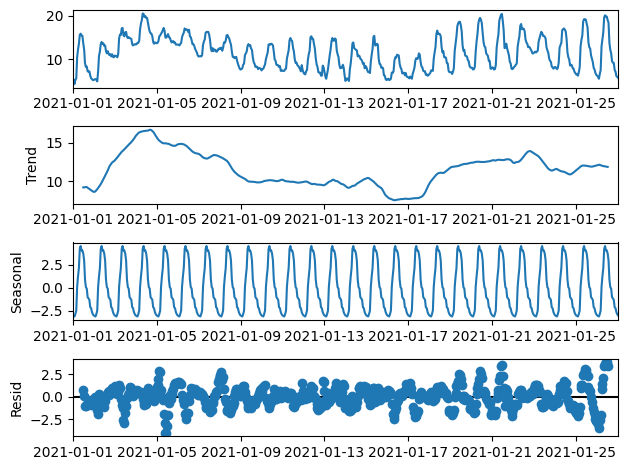

In [92]:
# now our data is ready for prediction

from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(dataset.head(625), model="additive")
decompose_data.plot();